 ## Detecting Twitter Bots

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.isotonic import spearmanr
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#%matplotlib inline


In [2]:
filepath='C:/Users/kowsh/OneDrive/Desktop/ViT/2-1 sem/2-1 sem fda (programs)/data fda 1/'
file= filepath+'training_data_2_csv_UTF.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]
print(training_data.columns)

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')


In [3]:
import csv

# Specify the input and output file paths
input_file_path = "C:/Users/kowsh/OneDrive/Desktop/ViT/2-1 sem/2-1 sem fda (programs)/data fda 1/training_data_2_csv_UTF.csv"
output_file_path = "C:/Users/kowsh/OneDrive/Desktop/ViT/2-1 sem/2-1 sem fda (programs)/data fda 1/traning_output1111.csv"

# Open the input CSV file for reading and the output CSV file for writing
with open(input_file_path, 'r', newline='', encoding='utf-8') as infile, \
        open(output_file_path, 'w', newline='', encoding='utf-8') as outfile:
    
    # Create a CSV reader and writer
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    # Iterate through each row in the input CSV
    for row in reader:
        # Remove double quotes from each cell in the row
        cleaned_row = [cell.replace('"', '') for cell in row]
        
        # Write the cleaned row to the output CSV
        writer.writerow(cleaned_row)

print("Double quotes removed successfully.")

Double quotes removed successfully.


In [4]:
filepath='C:/Users/kowsh/OneDrive/Desktop/ViT/2-1 sem/2-1 sem fda (programs)/data fda 1/'
file= filepath+'training_output1.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]
print(training_data.columns)

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')


In [5]:
# Display the first few rows of the dataset
print(training_data.head())

# Check the summary statistics
print(training_data.describe())

# Check for missing values
print(training_data.isnull().sum())


             id        id_str      screen_name                   location  \
0  8.160000e+17  8.160000e+17   HoustonPokeMap                Houston, TX   
1  4.843621e+09  4.843621e+09        kernyeahx  Templeville town, MD, USA   
2  4.303727e+09  4.303727e+09  mattlieberisbot                        NaN   
3  3.063139e+09  3.063139e+09        sc_papers                        NaN   
4  2.955142e+09  2.955142e+09     lucarivera16      Dublin, United States   

                                         description                      url  \
0  Rare and strong PokŽmon in Houston, TX. See mo...  https://t.co/dnWuDbFRkt   
1  From late 2014 Socium Marketplace will make sh...                      NaN   
2  Inspired by the smart, funny folks at @replyal...  https://t.co/P1e1o0m4KC   
3                                                NaN                      NaN   
4             Inspiring cooks everywhere since 1956.                      NaN   

   followers_count  friends_count  listed_count  \

 ### Exploratory Data Analysis

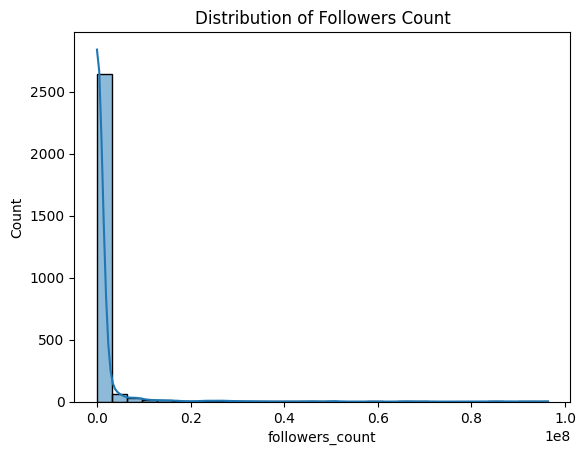

In [6]:
sns.histplot(training_data['followers_count'], bins=30, kde=True)
plt.title("Distribution of Followers Count")
plt.show()

 #### Identifying Missingness in the data

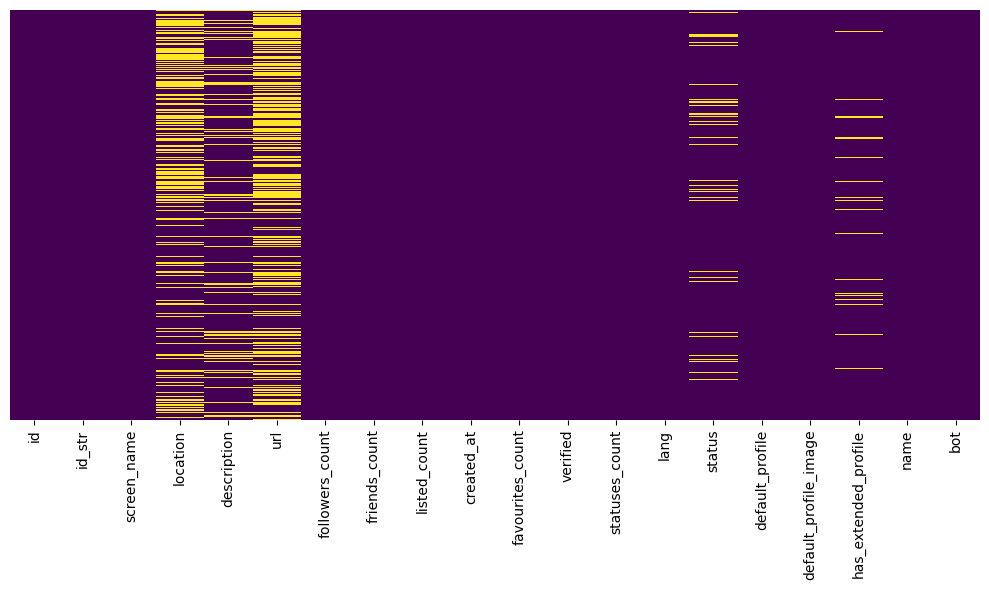

In [7]:
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(training_data)


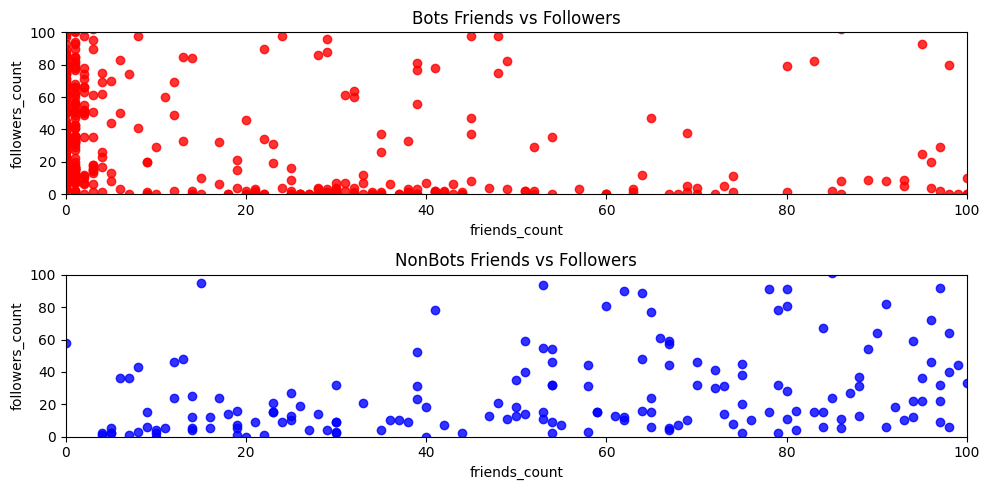

In [8]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(x=bots.friends_count, y= bots.followers_count, color='red', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(x=nonbots.friends_count,y= nonbots.followers_count, color='blue', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


 #### Identifying Imbalance in the data

In [9]:
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
bots[bots.friends_by_followers<1].shape

nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
nonbots[nonbots.friends_by_followers<1].shape


(952, 21)

(504, 21)


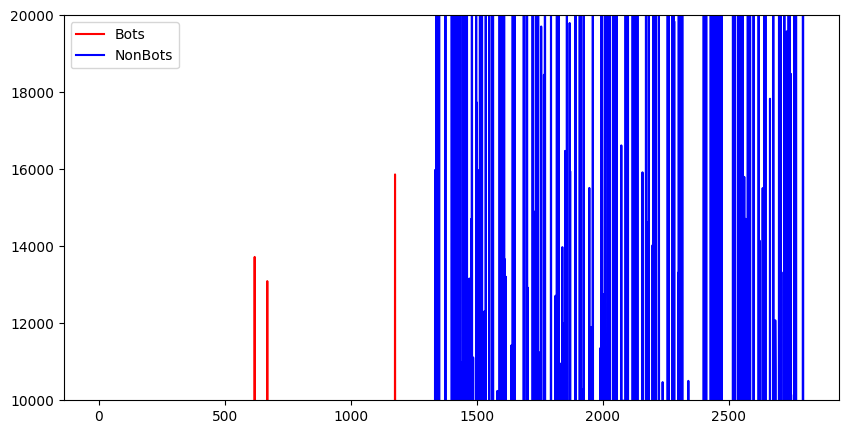

In [10]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(nonbots.listed_count, color='blue', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)
print(bots[(bots.listed_count<5)].shape)


In [11]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape


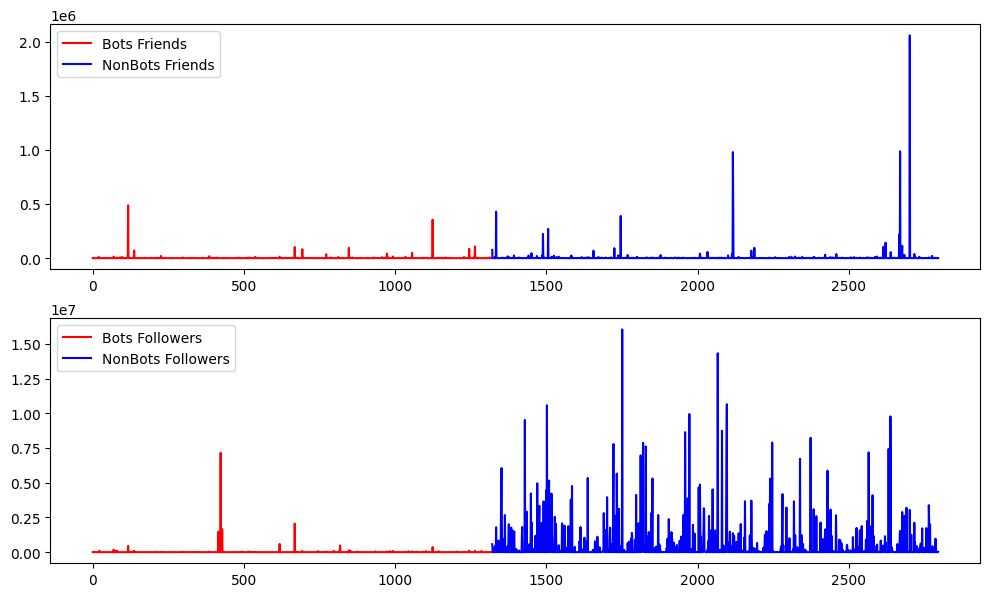

In [12]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBots Followers')
plt.legend(loc='upper left')


In [13]:
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape


(1321, 24)

In [14]:
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape


(1476, 24)

In [15]:
df = pd.concat([bots, nonbots])
df
df.shape


(2797, 24)

 ### Feature Independence using Spearman correlation

In [16]:
# Select only numeric columns
numeric_df = df._get_numeric_data()

# Calculate correlation
numeric_df.corr(method='spearman')


,id,id_str,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.270435,-0.576100,-0.215488,0.150100
id_str,1.000000,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.270435,-0.576100,-0.215488,0.150100
followers_count,-0.672925,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430,-0.577157,0.458213,0.172017,0.130717
friends_count,-0.402346,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105,0.427638,0.342145,0.074762,-0.210592
listed_count,-0.615005,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445,-0.681034,0.338698,0.171059,0.281360
favourites_count,-0.439430,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228,0.104797,0.408864,0.105437,-0.220894
verified,-0.611899,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555,-0.419815,0.434177,0.180129,0.346505
statuses_count,-0.451945,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018,-0.533971,0.162213,0.097673,0.207384
default_profile,0.522990,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748,0.197929,-0.377572,-0.124382,0.072351
default_profile_image,0.166601,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669,0.190986,-0.166388,0.035450,0.033021


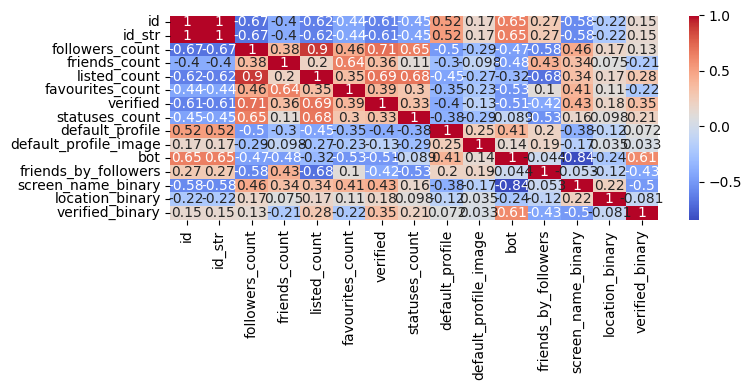

In [17]:
plt.figure(figsize=(8,4))
sns.heatmap(numeric_df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()


 Result:
 - There is no correlation between **id, statuses_count, default_profile, default_profile_image** and target variable.
 - There is strong correlation between **verified, listed_count, friends_count, followers_count** and target variable.
 - We cannot perform correlation for categorical attributes. So we will take **screen_name, name, description, status** into feature engineering. While use **verified, listed_count** for feature extraction.

 #### Performing Feature Engineering

In [18]:
filepath='C:/Users/kowsh/OneDrive/Desktop/ViT/2-1 sem/2-1 sem fda (programs)/data fda 1/'
file= open(filepath+'training_output1.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                           r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                           r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                           r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)


 #### Performing Feature Extraction

In [19]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']


 ## Implementing Different Models

 #### Decision Tree Classifier 70-30

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
end_time = time.time()
time_taken=end_time-start_time
print("Trainig precision: %.5f" %precision_score(y_train, y_pred_train))
print("Test precision: %.5f" %precision_score(y_test, y_pred_test))
print("Trainig recall: %.5f" %recall_score(y_train, y_pred_train))
print("Test recall: %.5f" %recall_score(y_test, y_pred_test))
print("Trainig f1: %.5f" %f1_score(y_train, y_pred_train))
print("Test f1: %.5f" %f1_score(y_test, y_pred_test))
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Model training time taken: ",time_taken)


Trainig precision: 0.90510
Test precision: 0.91123
Trainig recall: 0.84403
Test recall: 0.83693
Trainig f1: 0.87350
Test f1: 0.87250
Trainig Accuracy: 0.88707
Test Accuracy: 0.87857
Model training time taken:  0.010517597198486328


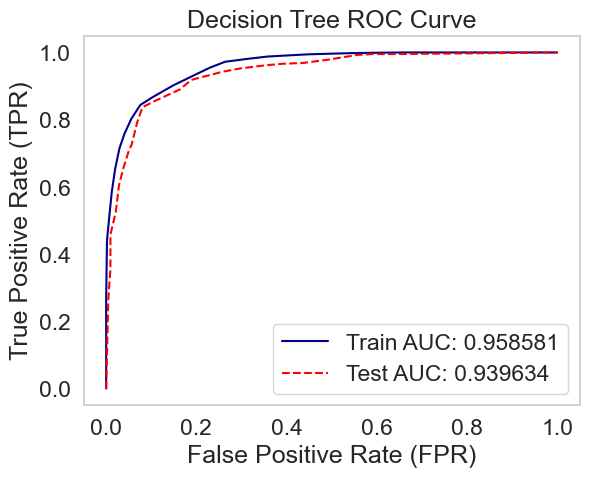

In [21]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = dt.predict_proba(X_train)
scores_test = dt.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')


 Result: Decision Tree gives very good performance and generalizes well. But it may be overfitting as AUC is 0.887, so we will try other models.

 #### Decision Tree Classifier 80-20

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
end_time = time.time()
time_taken=end_time-start_time
print("Trainig precision: %.5f" %precision_score(y_train, y_pred_train))
print("Test precision: %.5f" %precision_score(y_test, y_pred_test))
print("Trainig recall: %.5f" %recall_score(y_train, y_pred_train))
print("Test recall: %.5f" %recall_score(y_test, y_pred_test))
print("Trainig f1: %.5f" %f1_score(y_train, y_pred_train))
print("Test f1: %.5f" %f1_score(y_test, y_pred_test))
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Model training time taken: ",time_taken)

Trainig precision: 0.90224
Test precision: 0.88933
Trainig recall: 0.84623
Test recall: 0.82117
Trainig f1: 0.87334
Test f1: 0.85389
Trainig Accuracy: 0.88511
Test Accuracy: 0.86250
Model training time taken:  0.016677141189575195


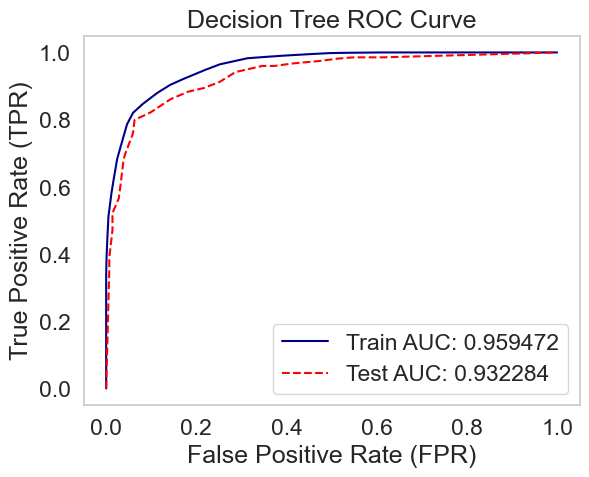

In [23]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = dt.predict_proba(X_train)
scores_test = dt.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

 #### Multinomial Naive Bayes Classifier 70-30

In [24]:
from sklearn.naive_bayes import MultinomialNB

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

mnb = MultinomialNB(alpha=0.0009)
start_time=time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

mnb = mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
end_time=time.time()
time_taken=end_time-start_time
print("Trainig precision: %.5f" %precision_score(y_train, y_pred_train))
print("Test precision: %.5f" %precision_score(y_test, y_pred_test))
print("Trainig recall: %.5f" %recall_score(y_train, y_pred_train))
print("Test recall: %.5f" %recall_score(y_test, y_pred_test))
print("Trainig f1: %.5f" %f1_score(y_train, y_pred_train))
print("Test f1: %.5f" %f1_score(y_test, y_pred_test))
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Model training time taken: ",time_taken)


Trainig precision: 0.59441
Test precision: 0.62597
Trainig recall: 0.96460
Test recall: 0.97122
Trainig f1: 0.73555
Test f1: 0.76128
Trainig Accuracy: 0.67961
Test Accuracy: 0.69762
Model training time taken:  0.0059053897857666016


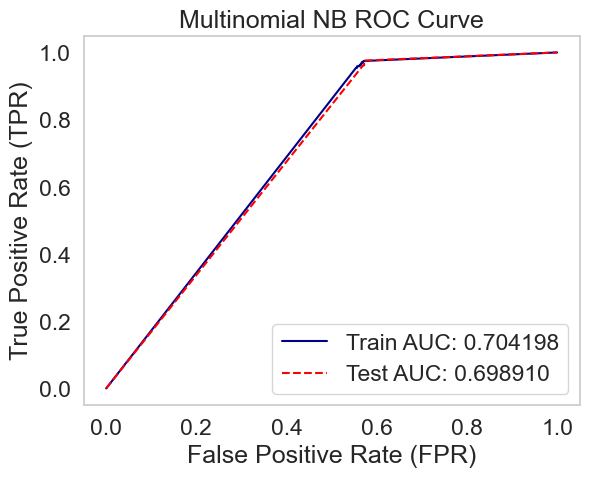

In [25]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = mnb.predict_proba(X_train)
scores_test = mnb.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_mnb_train, tpr_mnb_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_mnb_test, tpr_mnb_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_mnb_train, tpr_mnb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.plot(fpr_mnb_test, tpr_mnb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Multinomial NB ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')


 Result: Clearly, Multinomial Niave Bayes peforms poorly and is not a good choice as the Train AUC is just 0.679 and Test is 0.697.

 #### Multinomial Naive Bayes Classifier 80-20

In [26]:
from sklearn.naive_bayes import MultinomialNB

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

mnb = MultinomialNB(alpha=0.0009)
start_time=time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

mnb = mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
end_time=time.time()
time_taken=end_time-start_time
print("Trainig precision: %.5f" %precision_score(y_train, y_pred_train))
print("Test precision: %.5f" %precision_score(y_test, y_pred_test))
print("Trainig recall: %.5f" %recall_score(y_train, y_pred_train))
print("Test recall: %.5f" %recall_score(y_test, y_pred_test))
print("Trainig f1: %.5f" %f1_score(y_train, y_pred_train))
print("Test f1: %.5f" %f1_score(y_test, y_pred_test))
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Model training time taken: ",time_taken)

Trainig precision: 0.60143
Test precision: 0.61432
Trainig recall: 0.96562
Test recall: 0.97080
Trainig f1: 0.74120
Test f1: 0.75248
Trainig Accuracy: 0.68440
Test Accuracy: 0.68750
Model training time taken:  0.008878469467163086


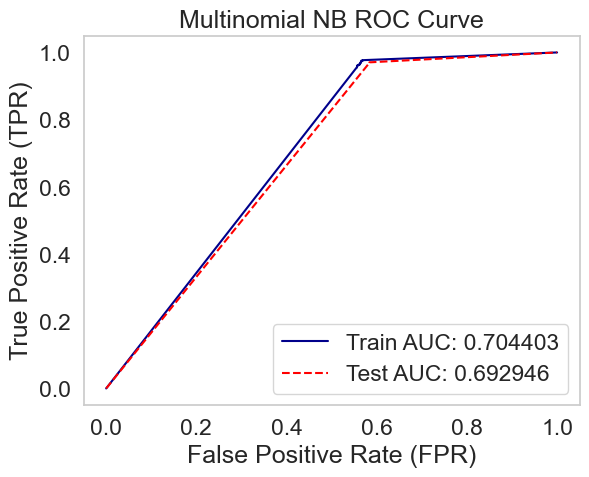

In [27]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = mnb.predict_proba(X_train)
scores_test = mnb.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_mnb_train, tpr_mnb_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_mnb_test, tpr_mnb_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_mnb_train, tpr_mnb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.plot(fpr_mnb_test, tpr_mnb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Multinomial NB ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

 #### Random Forest Classifier 70-30

In [28]:
from sklearn.ensemble import RandomForestClassifier

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)
start_time=time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
end_time=time.time()
time_taken=end_time=start_time
print("Trainig precision: %.5f" %precision_score(y_train, y_pred_train))
print("Test precision: %.5f" %precision_score(y_test, y_pred_test))
print("Trainig recall: %.5f" %recall_score(y_train, y_pred_train))
print("Test recall: %.5f" %recall_score(y_test, y_pred_test))
print("Trainig f1: %.5f" %f1_score(y_train, y_pred_train))
print("Test f1: %.5f" %f1_score(y_test, y_pred_test))
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Model training time taken: ",time_taken)


Trainig precision: 0.89517
Test precision: 0.89119
Trainig recall: 0.84071
Test recall: 0.82494
Trainig f1: 0.86708
Test f1: 0.85679
Trainig Accuracy: 0.88094
Test Accuracy: 0.86310
Model training time taken:  1703082892.2181377


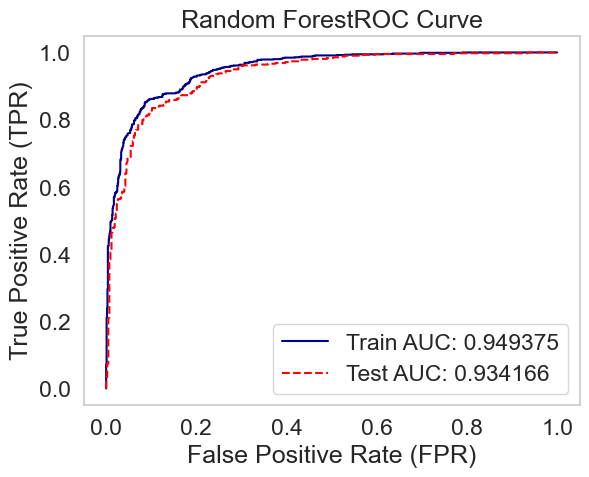

In [29]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random ForestROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')


RESULT: The Random Forest Classifier performs well and gives AUC of 0.87

 #### Random Forest Classifier 80-20

In [30]:
from sklearn.ensemble import RandomForestClassifier

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)
start_time=time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
end_time=time.time()
time_taken=end_time=start_time
print("Trainig precision: %.5f" %precision_score(y_train, y_pred_train))
print("Test precision: %.5f" %precision_score(y_test, y_pred_test))
print("Trainig recall: %.5f" %recall_score(y_train, y_pred_train))
print("Test recall: %.5f" %recall_score(y_test, y_pred_test))
print("Trainig f1: %.5f" %f1_score(y_train, y_pred_train))
print("Test f1: %.5f" %f1_score(y_test, y_pred_test))
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
print("Model training time taken: ",time_taken)

Trainig precision: 0.89939
Test precision: 0.87209
Trainig recall: 0.84527
Test recall: 0.82117
Trainig f1: 0.87149
Test f1: 0.84586
Trainig Accuracy: 0.88333
Test Accuracy: 0.85357
Model training time taken:  1703082892.766335


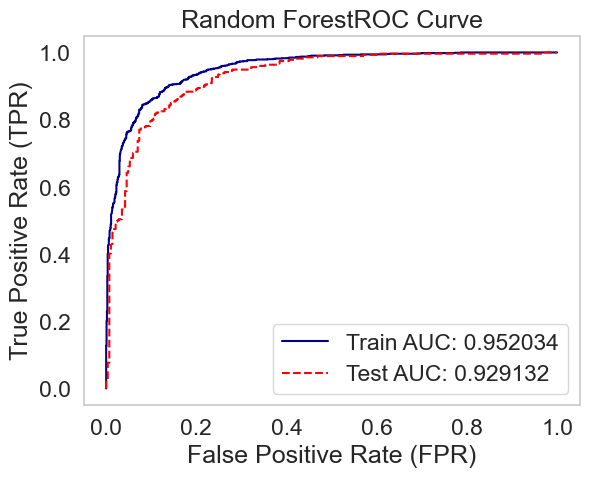

In [31]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random ForestROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

 #### Custom Classifier

Time taken to load data:  0.10232782363891602
time taken for model training 1.782090425491333
time taken for model training 0.5475552082061768
Train Accuracy:  0.9582542694497154
time taken for model training 1.7588648796081543
time taken for model training 0.6394147872924805
Test Accuracy:  0.9578804347826086
time taken for model training 1.9073023796081543
time taken for model training 0.5239889621734619
Train precision:  0.9364754098360656
time taken for model training 1.7508974075317383
time taken for model training 0.6364784240722656
Test precision:  0.9
time taken for model training 1.730344533920288
time taken for model training 0.6963956356048584
Train recall:  1.0
time taken for model training 1.8016629219055176
time taken for model training 0.6036357879638672
Test recall:  1.0
time taken for model training 1.7512502670288086
time taken for model training 0.5774590969085693
Train f1:  0.9721784776902888
time taken for model training 1.7993075847625732
time taken for model trai

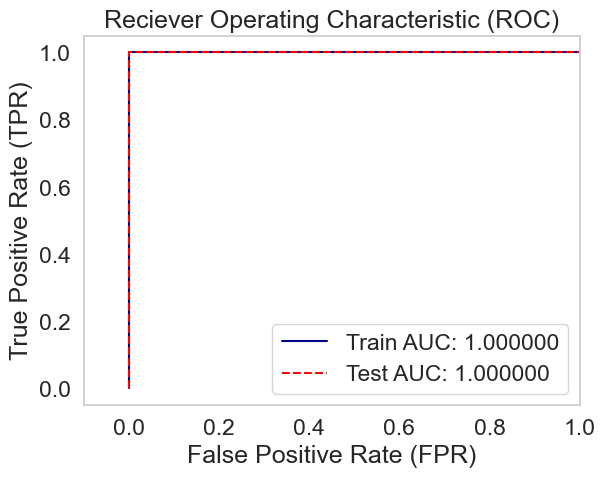

In [32]:
class twitter_bot(object):
    def __init__(self):
        pass

    def perform_train_test_split(df):
            msk = np.random.rand(len(df)) < 0.75
            train, test = df[msk], df[~msk]
            X_train, y_train = train.drop(columns=train.columns[-1]), train.iloc[:,-1]
            X_test, y_test = test.drop(columns=test.columns[-1]), test.iloc[:,-1]
            return X_train, y_train, X_test, y_test

    def bot_prediction_algorithm(df):
        # creating copy of dataframe
        train_df = df.copy()
        train_df['bot']=pd.Series(dtype=object)
        
        # performing feature engineering on id and verfied columns
        # converting id to int
        start_time=time.time()
        #print(train_df.columns)
        train_df['id'] = train_df.id.apply(lambda x: int(x))
        train_df['followers_count'] = train_df.followers_count.apply(lambda x: 0 if pd.isnull(x) else int(x))
        train_df['friends_count'] = train_df.friends_count.apply(lambda x: 0 if pd.isnull(x) else int(x))
        
        #We created two bag of words because more bow is stringent on test data, so on all small dataset we check less
        
        if train_df.shape[0]>600:
            #bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                           r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                           r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                           r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
        else:
            # bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|mishear|updates every'

        # converting verified into vectors
        train_df['verified'] = train_df.verified.apply(lambda x: 1 if ((x == True) or x == 'TRUE') else 0)

        # check if the name contains bot or screenname contains b0t
        condition = ((train_df.name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.description.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.status.str.contains(bag_of_words_bot, case=False, na=False))
                      )  # these all are bots
        predicted_df = train_df[condition]  # these all are bots
        predicted_df.bot = 1
        predicted_df = predicted_df[['id', 'bot']]

        # check if the user is verified
        verified_df = train_df[~condition]
        condition = (verified_df.verified == 1)  # these all are nonbots
        predicted_df1 = verified_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if description contains buzzfeed
        buzzfeed_df = verified_df[~condition]
        condition = (buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False))  # these all are nonbots
        predicted_df1 = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if listed_count>16000
        listed_count_df = buzzfeed_df[~condition]
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if x == 'None' else x)
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: int(x))
        condition = (listed_count_df.listed_count > 16000)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        #remaining
        predicted_df1 = listed_count_df[~condition][['id', 'bot']]
        predicted_df1.bot = 0 # these all are nonbots
        predicted_df = pd.concat([predicted_df, predicted_df1])
        end_time=time.time()
        time_taken=end_time-start_time
        print("time taken for model training",time_taken)
        return predicted_df


    def get_predicted_and_true_values(features, target):
        y_pred, y_true = twitter_bot.bot_prediction_algorithm(features).bot.tolist(), target.tolist()
        return y_pred, y_true

    def get_accuracy_score(df):
        X_train, y_train, X_test, y_test = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = metrics.accuracy_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = metrics.accuracy_score(y_pred_test, y_true_test)
        return train_acc, test_acc
    
    def get_precision_score(df):
        X_train, y_train, X_test, y_test = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = metrics.precision_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = metrics.precision_score(y_pred_test, y_true_test)
        return train_acc, test_acc
    
    def get_recall_score(df):
        X_train, y_train, X_test, y_test = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = metrics.recall_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = metrics.recall_score(y_pred_test, y_true_test)
        return train_acc, test_acc
    
    def get_f1_score(df):
        X_train, y_train, X_test, y_test = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = metrics.f1_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = metrics.f1_score(y_pred_test, y_true_test)
        return train_acc, test_acc
    
    def plot_roc_curve(df):
        X_train, y_train, X_test, y_test = twitter_bot.perform_train_test_split(df)
        # Train ROC
        y_pred_train, y_true = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        scores = np.linspace(start=0.01, stop=0.9, num=len(y_true))
        fpr_train, tpr_train, threshold = metrics.roc_curve(y_pred_train, scores, pos_label=0)
        plt.plot(fpr_train, tpr_train, label='Train AUC: %5f' % metrics.auc(fpr_train, tpr_train), color='darkblue')
        #Test ROC
        y_pred_test, y_true = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        scores = np.linspace(start=0.01, stop=0.9, num=len(y_true))
        fpr_test, tpr_test, threshold = metrics.roc_curve(y_pred_test, scores, pos_label=0)
        plt.plot(fpr_test,tpr_test, label='Test AUC: %5f' %metrics.auc(fpr_test,tpr_test), ls='--', color='red')
        #Misc
        plt.xlim([-0.1,1])
        plt.title("Reciever Operating Characteristic (ROC)")
        plt.xlabel("False Positive Rate (FPR)")
        plt.ylabel("True Positive Rate (TPR)")
        plt.legend(loc='lower right')
        plt.show()


if __name__ == '__main__':
    start = time.time()
    filepath='C:/Users/kowsh/OneDrive/Desktop/ViT/2-1 sem/2-1 sem fda (programs)/data fda 1/'
    train_df = pd.read_csv(filepath + 'training_output1.csv')
    test_df = pd.read_csv(filepath + 'test_data_4_students.csv')
    print("Time taken to load data: ", time.time()-start)
    print("Train Accuracy: ", twitter_bot.get_accuracy_score(train_df)[0])
    print("Test Accuracy: ", twitter_bot.get_accuracy_score(train_df)[1])
    print("Train precision: ", twitter_bot.get_precision_score(train_df)[0])
    print("Test precision: ", twitter_bot.get_precision_score(train_df)[1])
    print("Train recall: ", twitter_bot.get_recall_score(train_df)[0])
    print("Test recall: ", twitter_bot.get_recall_score(train_df)[1])
    print("Train f1: ", twitter_bot.get_f1_score(train_df)[0])
    print("Test f1: ", twitter_bot.get_f1_score(train_df)[1])
    #predicting test data results
    predicted_df = twitter_bot.bot_prediction_algorithm(test_df)
    #plotting the ROC curve
    twitter_bot.plot_roc_curve(train_df)


 ### ROC Comparison after tuning the baseline model

time taken for model training 1.7352511882781982
time taken for model training 0.7548179626464844


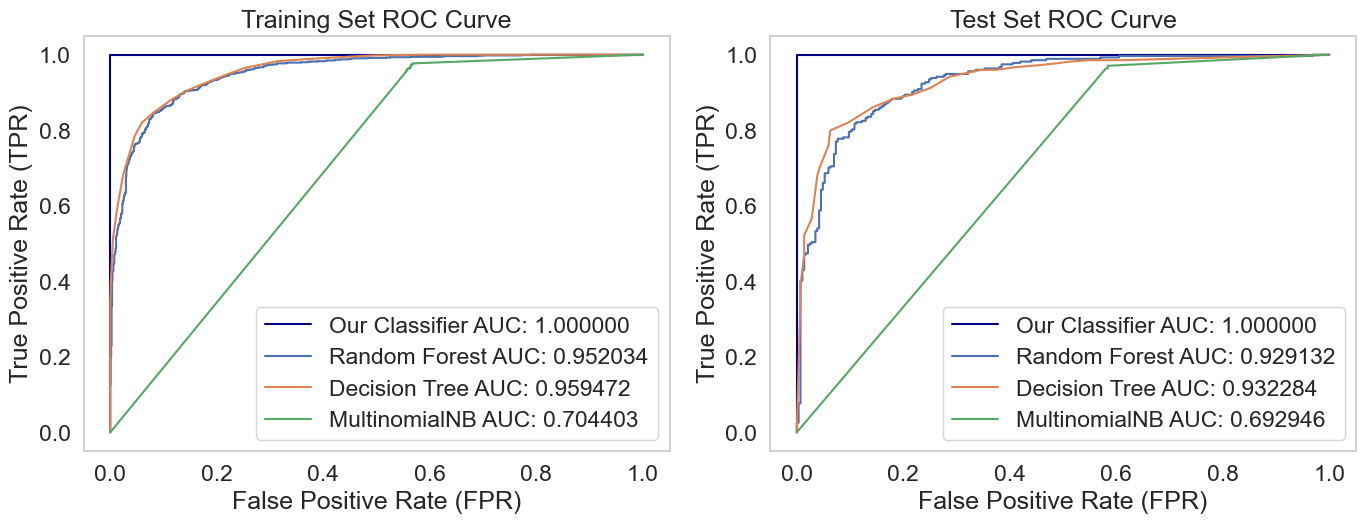

In [33]:
plt.figure(figsize=(14,10))
(X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
#Train ROC
y_pred_train, y_true = twitter_bot.get_predicted_and_true_values(X_train, y_train)
scores = np.linspace(start=0, stop=1, num=len(y_true))
fpr_botc_train, tpr_botc_train, threshold = metrics.roc_curve(y_pred_train, scores, pos_label=0)

#Test ROC
y_pred_test, y_true = twitter_bot.get_predicted_and_true_values(X_test, y_test)
scores = np.linspace(start=0, stop=1, num=len(y_true))
fpr_botc_test, tpr_botc_test, threshold = metrics.roc_curve(y_pred_test, scores, pos_label=0)

#Train ROC
plt.subplot(2,2,1)
plt.plot(fpr_botc_train, tpr_botc_train, label='Our Classifier AUC: %5f' % metrics.auc(fpr_botc_train,tpr_botc_train), color='darkblue')
plt.plot(fpr_rf_train, tpr_rf_train, label='Random Forest AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_dt_train, tpr_dt_train, label='Decision Tree AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_mnb_train, tpr_mnb_train, label='MultinomialNB AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.title("Training Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

#Test ROC
plt.subplot(2,2,2)
plt.plot(fpr_botc_test,tpr_botc_test, label='Our Classifier AUC: %5f' %metrics.auc(fpr_botc_test,tpr_botc_test), color='darkblue')
plt.plot(fpr_rf_test, tpr_rf_test, label='Random Forest AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.plot(fpr_dt_test, tpr_dt_test, label='Decision Tree AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.plot(fpr_mnb_test, tpr_mnb_test, label='MultinomialNB AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Test Set ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')
plt.tight_layout()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [35]:
#Gives heatmap of null values
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()



In [36]:
filepath = 'C:/Users/kowsh/OneDrive/Desktop/ViT/2-1 sem/2-1 sem fda (programs)/data fda 1/'
train_df = pd.read_csv(filepath+'training_output1.csv')
test_df_backup = pd.read_csv(filepath+'test_data_4_students.csv')
#print(test_df_backup.columns)
#print(train_df.columns)
test_df_backup.id = test_df_backup.id.apply(lambda x: int(x))
test_df_backup.id = test_df_backup['id'].astype(int)


In [37]:
test_df = test_df_backup.copy()
train_bots = train_df[train_df.bot==1]
train_nonbots = train_df[train_df.bot==0]
train_bots['screen_name_binary']=pd.Series(dtype=object)
train_nonbots['screen_name_binary']=pd.Series(dtype=object)
train_bots['screen_name_binary'] = (train_bots.screen_name.str.contains("bot", case=False)==True)
train_nonbots['screen_name_binary'] = (train_nonbots.screen_name.str.contains("bot", case=False))

training_df = pd.concat([train_bots, train_nonbots])

test_df['screen_name_binary'] = (test_df.screen_name.str.contains("bot", case=False)==True)

In [38]:
#test_df[(test_df.screen_name.str.contains("bot", case=False)==True)] #206 these all are bots

listed_count_df = test_df[(test_df.screen_name.str.contains("bot", case=False)==False)]
final_df = test_df[(test_df.screen_name.str.contains("bot", case=False)==True)] #206 these all are bots
final_df.bot=1
final_df = final_df[['id', 'bot']]
final_df.shape[0]


206

In [39]:
listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if pd.isnull(x) else x)
listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: int(x))

In [40]:
listed_count_df[listed_count_df.listed_count>16000].shape #these all are nonbots
final_df1 = listed_count_df[listed_count_df.listed_count>16000][['id', 'bot']]
final_df1.bot=0
final_df1.shape
final_df = pd.concat([final_df, final_df1])
final_df.shape[0]

300

In [41]:
verified_df = listed_count_df[listed_count_df.listed_count<16000]

In [42]:
verified_df[verified_df.verified=='TRUE'].shape #these all are nonbots
final_df1 = verified_df[verified_df.verified=='TRUE'][['id', 'bot']]
final_df1.bot=0
final_df = pd.concat([final_df, final_df1])
final_df.shape

(300, 2)

In [43]:

description_df = verified_df[verified_df.verified!='TRUE']

In [44]:
description_df[description_df.description.str.contains("bot", case=False, na=False)].shape #these all are bots

final_df1 = description_df[description_df.description.str.contains("bot", case=False, na=False)][['id', 'bot']]
final_df1.bot=1
final_df = pd.concat([final_df, final_df1])
final_df.shape

(349, 2)

In [45]:
status_df = description_df[description_df.description.str.contains("bot", case=False, na=False)==False]

In [46]:
status_df[status_df.status.str.contains("bot", case=False, na=False)].shape #these all are bots
final_df1 = status_df[status_df.status.str.contains("bot", case=False, na=False)][['id', 'bot']]
final_df1.bot=1
final_df = pd.concat([final_df, final_df1])
final_df.shape

(366, 2)

In [47]:
buzzfeed_df = status_df[status_df.status.str.contains("bot", case=False, na=False)==False]

buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)].shape #these all are nonbots

final_df1 = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)][['id','bot']]
final_df1.bot=0
final_df = pd.concat([final_df, final_df1])
final_df.shape

(457, 2)

In [48]:
name_df = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)==False]
condition = (name_df.name.str.contains("bot", case=False, na=False)) | (name_df.screen_name.str.contains("b0t", case=False, na=False))
name_df[condition].shape #these all are bots

final_df1 = name_df[condition][['id','bot']]
final_df1.bot=1
final_df = pd.concat([final_df, final_df1])
final_df.shape

(463, 2)

In [49]:
truth_df = name_df[(name_df.name.str.contains("bot", case=False, na=False))==False] #shape: 83

condition = ((truth_df.screen_name.str.contains("truth", case=False, na=False)) | 
            (truth_df.name.str.contains("truth", case=False, na=False)) | 
            (truth_df.screen_name.str.contains("anony", case=False, na=False)))

truth_df[condition].shape #these all are bots

final_df1 = truth_df[condition][['id','bot']]
final_df1.bot=1
final_df = pd.concat([final_df, final_df1])
final_df.shape


(467, 2)

In [50]:
statuses_count_df = truth_df[~condition]
condition = ((statuses_count_df.description.str.contains('cannabis', case=False, na=False)) | (statuses_count_df.description.str.contains('mishear', case=False, na=False))) #these all are bots
statuses_count_df[condition]


,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,...,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,Unnamed: 19,bot,screen_name_binary
301,159966364,NaN,MedischeWiet,Nederland,#Breaking_News on #Medical_Cannabis / #Medical...,http://t.co/tolqnqt7pX,2322.0,643.0,96,Sat Jun 26 20:27:54 +0000 2010,...,672220,en,"{u'lang': u'en', u'text': u'TOP: Wayne schools...",NaN,NaN,NaN,Medical Cannabis,NaN,NaN,False
310,-1913651840,2.381315e+09,misheardly,NaN,I mishear song lyrics. Written by @molly0x57.\...,https://t.co/0F55R220sN,79.0,1.0,22,03-10-2014 01:35,...,16025,en,"{'favorite_count': 0, 'id': 780625556454903812...",False,False,False,Misheardly,NaN,NaN,False


In [51]:
statuses_count_df[~condition].shape
final_df1 = statuses_count_df[~condition][['id','bot']] #these all are nonbots
final_df1.bot=0
final_df = pd.concat([final_df, final_df1])
final_df.shape

(573, 2)

In [52]:
final_df.to_csv(filepath+'submission11.csv', index=False)